6794690.442708369 6794690.442708369


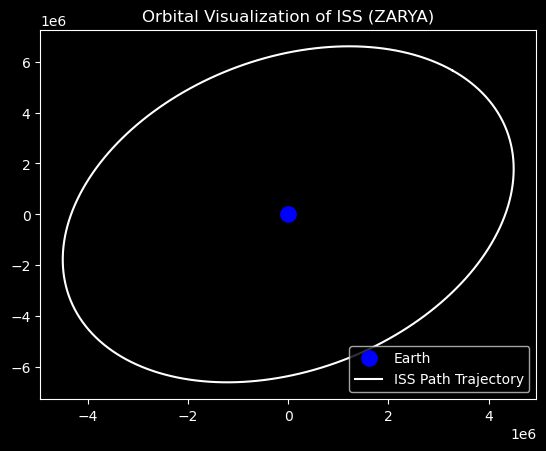

In [37]:
from PyAstronomy import pyasl
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
class orbital_visualizer:
    def __init__(self,file_name):
        self.name=""
        self.line1=""
        self.line2=""
        self.tle_file=file_name
        self.satellite=None
    def extract_tle_content(self):
        with open(self.tle_file,"r") as file:
            lines=file.readlines()
            self.name=lines[0].strip()
            self.line1=lines[1].strip()
            self.line2=lines[2].strip()
    def parse_tle(self):
        satellite_number = int(self.line1[2:7])
        classification = self.line1[7]
        international_designator_year = int(self.line1[9:11])
        international_designator_launch_number = int(self.line1[11:14])
        international_designator_piece_of_launch = self.line1[14:17]
        epoch_year = int(self.line1[18:20])
        epoch_day = float(self.line1[20:32])
        first_derivative_mean_motion = float(self.line1[33:43])
        second_derivative_mean_motion = self.line1[45:52]
        bstar_drag_term = self.line1[53:61]
        ephemeris_type = int(self.line1[62])
        element_number = int(self.line1[64:68])
    
        # Extracting values from Line 2
        inclination = float(self.line2[8:16])
        raan = float(self.line2[17:25])
        eccentricity = float("0." + self.line2[26:33])
        argument_of_perigee = float(self.line2[34:42])
        mean_anomaly = float(self.line2[43:51])
        mean_motion = float(self.line2[52:63])
        revolution_number = int(self.line2[63:68])
        self.satellite={
            "satellite_number": satellite_number,
            "classification": classification,
            "international_designator_year": international_designator_year,
            "international_designator_launch_number": international_designator_launch_number,
            "international_designator_piece_of_launch": international_designator_piece_of_launch,
            "epoch_year": epoch_year,
            "epoch_day": epoch_day,
            "first_derivative_mean_motion": first_derivative_mean_motion,
            "second_derivative_mean_motion": second_derivative_mean_motion,
            "bstar_drag_term": bstar_drag_term,
            "ephemeris_type": ephemeris_type,
            "element_number": element_number,
            "inclination": inclination,
            "raan": raan,
            "eccentricity": eccentricity,
            "argument_of_perigee": argument_of_perigee,
            "mean_anomaly": mean_anomaly,
            "mean_motion": mean_motion,
            "revolution_number": revolution_number,
            "semi_major_axis":0,
            "orbital_period":0 }
    def orbital_period(self):
        G = 6.674 * 10**-11  # Gravitational constant (m³ kg⁻¹ s⁻²)
        M = 5.972 * 10**24   # Mass of the Earth (kg)
        self.satellite["orbital_period"]=2 * math.pi * math.sqrt(self.satellite["semi_major_axis"]**3 / (G * M))
    def semi_major_axis(self):
        G = 6.674 * 10**-11  # Gravitational constant (m³ kg⁻¹ s⁻²)
        M = 5.972 * 10**24   # Mass of the Earth (kg)
        n = self.satellite["mean_motion"] * (2 * math.pi) / (24 * 60 * 60)  # Convert mean motion from rev/day to rad/s
        self.satellite["semi_major_axis"]=(G * M / (n**2))**(1/3)
    def plot(self):
        orbit = pyasl.KeplerEllipse(
            a=self.satellite["semi_major_axis"],  # Semi-major axis
            per=self.satellite["orbital_period"],       # Orbital period
            e=self.satellite["eccentricity"],   # Eccentricity
            Omega=self.satellite["raan"],       # Right Ascension of Ascending Node (RAAN)
            i=self.satellite["inclination"],    # Inclination
            w=self.satellite["argument_of_perigee"]  # Argument of Perigee
        )

        a=self.satellite["semi_major_axis"]*np.sqrt(1-self.satellite["eccentricity"]**2)
        c=np.sqrt(a**2-self.satellite["eccentricity"]**2)
        print(c,a)
        t = np.linspace(0, self.satellite["orbital_period"], 200)
        pos = orbit.xyzPos(t)
        plt.style.use('dark_background')
        plt.plot(0,0, 'bo', markersize=11, label="Earth")
        plt.plot(pos[::, 1], pos[::, 0], 'w-', label="ISS Path Trajectory")
        plt.legend(loc="lower right")
        plt.title(f'Orbital Visualization of {self.name}')
        plt.show()
        
obj=orbital_visualizer("tle.txt")
obj.extract_tle_content()
obj.parse_tle()
obj.semi_major_axis()
obj.orbital_period()
obj.plot()